C:\Users\admin\AppData\Local\Temp\ipykernel_15584\1206647596.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=geo_dist.head(10), x='percentage', y='country', palette='viridis')


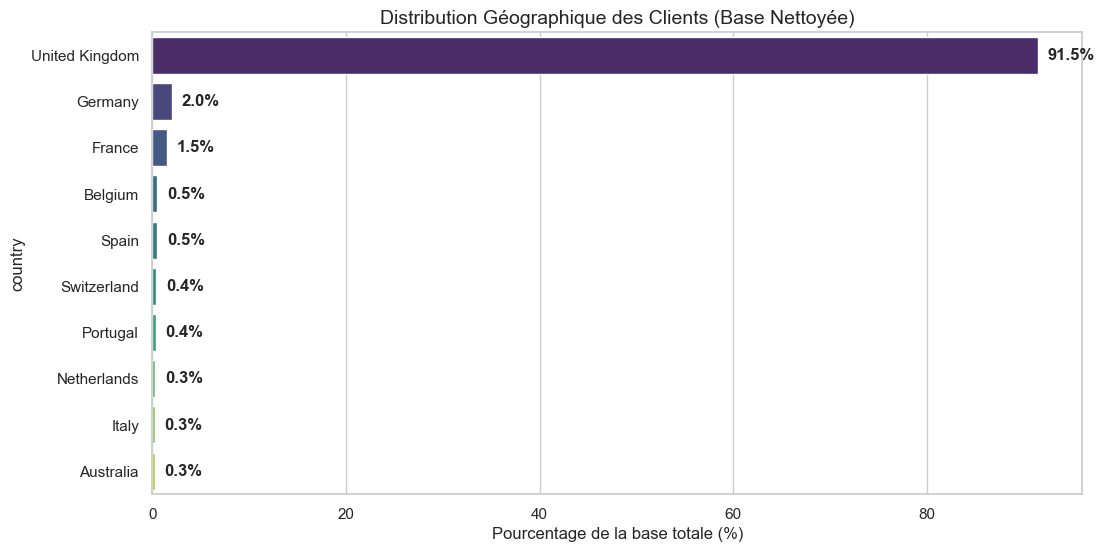

C:\Users\admin\AppData\Local\Temp\ipykernel_15584\1206647596.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_geo_kpi, x='country', y='avg_basket', ax=ax1, palette='Set2')
C:\Users\admin\AppData\Local\Temp\ipykernel_15584\1206647596.py:43: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_geo_kpi, x='country', y='n_orders', ax=ax2, palette='Set2')


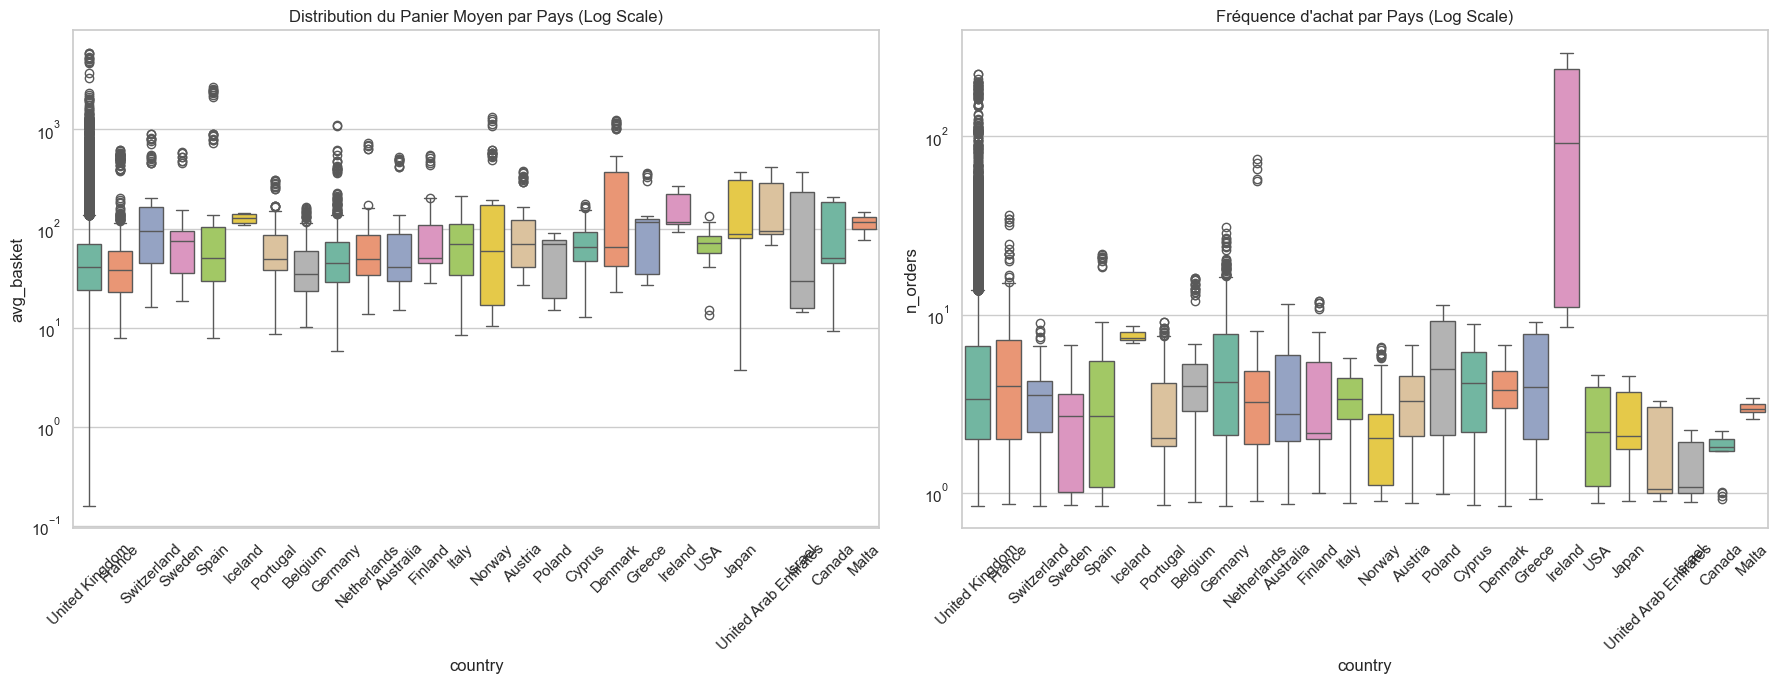

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Chargement du fichier nettoyé
df_clean = pd.read_csv('customers_cleaned_final.csv')

# Configuration visuelle
sns.set_theme(style="whitegrid")
plt.rcParams['figure.figsize'] = (14, 7)

# --- VISUALISATION 1 : Confirmation du Biais de Sélection ---
# Calcul des parts de marché par pays
geo_dist = df_clean['country'].value_counts(normalize=True).reset_index()
geo_dist.columns = ['country', 'percentage']
geo_dist['percentage'] *= 100

plt.figure(figsize=(12, 6))
ax = sns.barplot(data=geo_dist.head(10), x='percentage', y='country', palette='viridis')

# Ajout des annotations de pourcentage
for i, p in enumerate(ax.patches):
    ax.annotate(f'{p.get_width():.1f}%', (p.get_width() + 1, i), va='center', weight='bold')

plt.title('Distribution Géographique des Clients (Base Nettoyée)', fontsize=14)
plt.xlabel('Pourcentage de la base totale (%)')
plt.show()

# --- VISUALISATION 2 : Comparaison des Comportements d'Achat ---
# Filtrage pour ne garder que les pays avec un échantillon représentatif (> 10 clients)
significant_countries = df_clean['country'].value_counts()[df_clean['country'].value_counts() > 10].index
df_geo_kpi = df_clean[df_clean['country'].isin(significant_countries)]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 7))

# A. Boxplot du Panier Moyen par Pays
sns.boxplot(data=df_geo_kpi, x='country', y='avg_basket', ax=ax1, palette='Set2')
ax1.set_yscale('log') # Échelle log pour gérer les disparités B2B/B2C
ax1.set_title('Distribution du Panier Moyen par Pays (Log Scale)')
ax1.tick_params(axis='x', rotation=45)

# B. Boxplot du Nombre de Commandes
sns.boxplot(data=df_geo_kpi, x='country', y='n_orders', ax=ax2, palette='Set2')
ax2.set_yscale('log')
ax2.set_title('Fréquence d\'achat par Pays (Log Scale)')
ax2.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()